MNS Computer Practical - Exercise 3 

Bramantyo Ibrahim Supriyatno

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1
## (a)

In [2]:
def compute_sinusoidal_grating(A, K, theta, phi, x0=5, y0=5, del_x=0.1, del_y=0.1):
    xs = np.arange(-x0,x0,step=del_x)
    ys = np.arange(-y0,y0,step=del_y)
    
    xv, yv = np.meshgrid(xs, ys)
    
    return A * np.cos(K*xv*np.cos(theta) + K*yv*np.sin(theta) - phi)

## (b)

In [3]:
theta = 0
phi = 0
K = np.pi
A=1

del_x = 0.1
del_y = 0.1

sin_gr = compute_sinusoidal_grating(A, K, theta, phi, del_x=del_x, del_y=del_y)

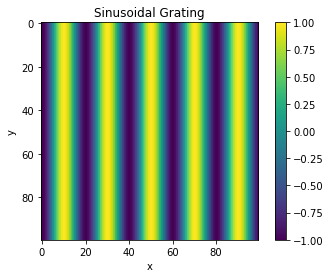

In [4]:
plt.imshow(sin_gr)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sinusoidal Grating')
plt.show()

In [5]:
thetas = np.linspace(0,0.5*np.pi,4).tolist()

In [6]:
Ks = np.linspace(0,0.5*np.pi,4).tolist()

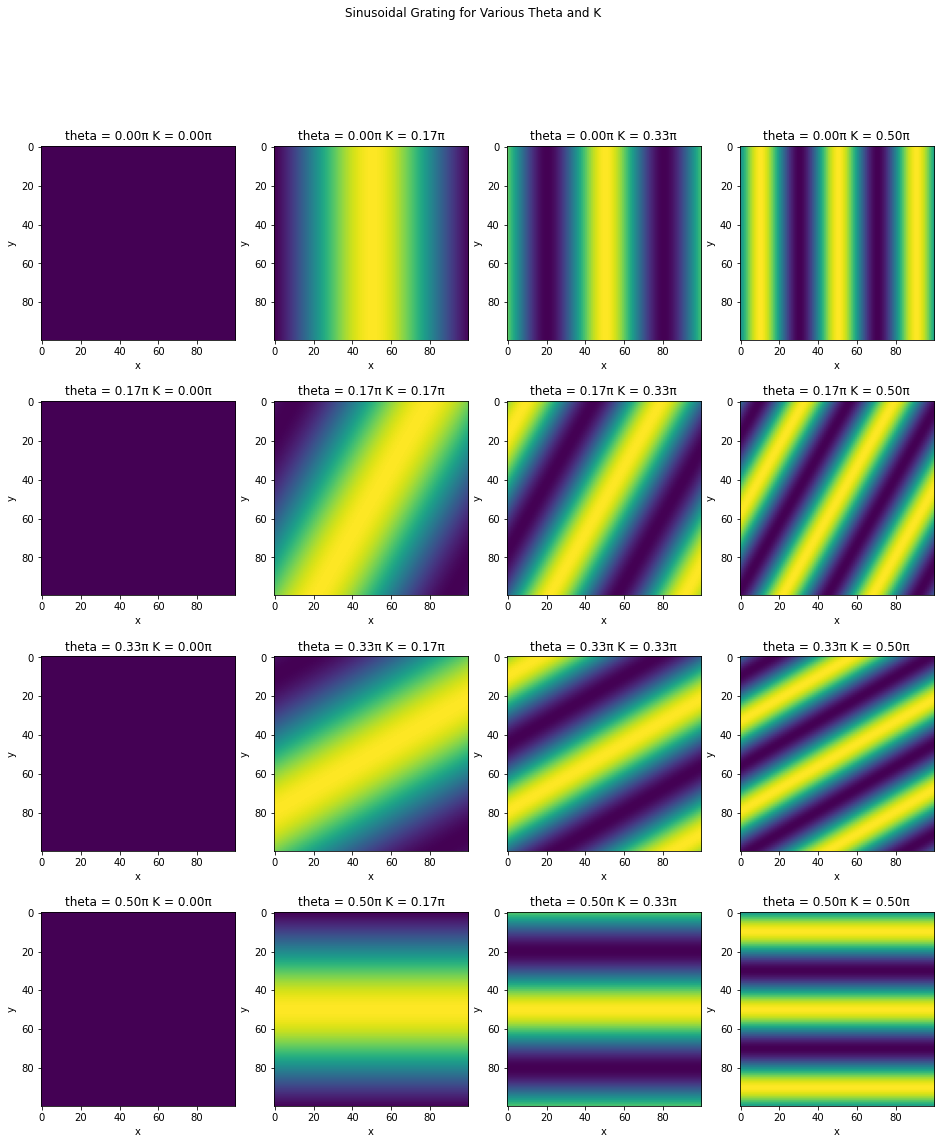

In [7]:
fig, axs = plt.subplots(4, 4,figsize=(16,18))

fig.suptitle('Sinusoidal Grating for Various Theta and K')

for i, theta in enumerate(thetas):
    for j, K in enumerate(Ks):
        axs[i,j].imshow(compute_sinusoidal_grating(A, K, theta, phi))
        axs[i,j].set_xlabel('x')
        axs[i,j].set_ylabel('y')
        axs[i,j].set_title('theta = {:.2f}π K = {:.2f}π'.format(theta/np.pi, K/np.pi))

# 2

## (a)

In [8]:
def compute_gabor_rf(k, phi, sigma_x, sigma_y, x0=5, y0=5, del_x=0.1, del_y=0.1):
    
    xs = np.arange(-x0,x0,step=del_x)
    ys = np.arange(-y0,y0,step=del_y)
    
    xv, yv = np.meshgrid(xs, ys)
    
    return (1./(2*np.pi*sigma_x*sigma_y)) * np.exp(-(xv**2)/(2.*sigma_x**2) - (yv**2)/(2.*sigma_y**2))*np.cos(k*xv - phi)

In [9]:
gabor = compute_gabor_rf(np.pi, 0, 2, 1, del_x=del_x, del_y=del_y)

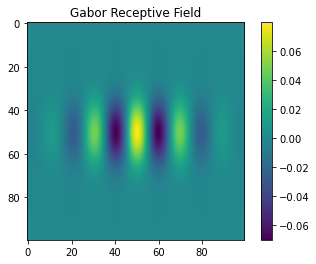

In [10]:
plt.imshow(gabor)
plt.title('Gabor Receptive Field')
plt.colorbar()
plt.show()

## (b)

The gabor receptive field would favor stimuli that matches the rf form. For example, for the gabor rf above, stimuli that has bigger value on the center and lower value on the surounding would result a higher firing rate. Such an example can be found in edges or bars with certain direction.

Gabor receptive field can be found in the primary visual cortex which has sensitivity to orientation

Since it is quite clear that the RF above has defined area of inhibition and facilitation, it is likely a simple cell. Complex cell should have a more complex RF that resembled of a combination of multiple simple cells.

## (c)

In [11]:
def compute_nr(stimuli, rf, del_x, del_y):
    return del_x * del_y * np.sum(np.sum(stimuli * rf, axis=0), axis=0)

In [12]:
sin_nr = compute_nr(sin_gr, gabor, del_x, del_y)

In [13]:
flat_stimuli = A *np.ones_like(sin_gr)
flat_nr = compute_nr(flat_stimuli, gabor, del_x, del_y)

In [14]:
print('response from sinusiodal grating : {:.2f}'.format(sin_nr))

response from sinusiodal grating : 0.49


In [15]:
print('response from flat stimuli : {:.2f}'.format(flat_nr))

response from flat stimuli : 0.00


The result from sinusoidal grating is bigger that flat stimuli. The sinusoidal grating has the same spatial frequency with gabor RF. This results in facilitating behavior thus resulting in bigger neuronal response. On the other side, flat stimuli does not have frequency thus all the elements cancel out each others.

# 3

## (a)

In [16]:
phi = 0
K= np.pi
A=1

del_x = 0.1
del_y = 0.1

In [17]:
thetas = np.linspace(0,2*np.pi,16).tolist()

In [18]:
nrs = []
gabor = compute_gabor_rf(np.pi, phi, 2, 1, del_x=del_x, del_y=del_y)
for i, theta in enumerate(thetas):
    sin_gr = compute_sinusoidal_grating(A, K, theta, phi,del_x=del_x, del_y=del_y)
    nrs.append(compute_nr(sin_gr, gabor, del_x, del_y)) 

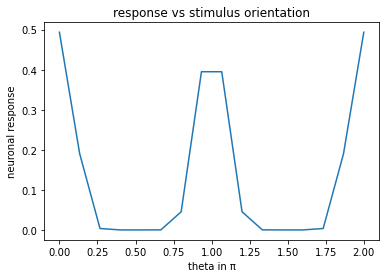

In [19]:
thetas_pi = np.array(thetas)/np.pi

plt.plot(thetas_pi, nrs)
plt.title('response vs stimulus orientation')
plt.xlabel('theta in π')
plt.ylabel('neuronal response')
plt.show()

## (b)

In [20]:
theta = 0
phi = 0
A=1

del_x = 0.1
del_y = 0.1

In [21]:
K_ks = np.linspace(0.0, 2, 32)

In [22]:
nrs = []

gabor = compute_gabor_rf(np.pi, phi, 2, 1, del_x=del_x, del_y=del_y)
for i, K in enumerate(K_ks):
    sin_gr = compute_sinusoidal_grating(A, np.pi*K, theta, phi,del_x=del_x, del_y=del_y)
    nrs.append(compute_nr(sin_gr, gabor, del_x, del_y)) 

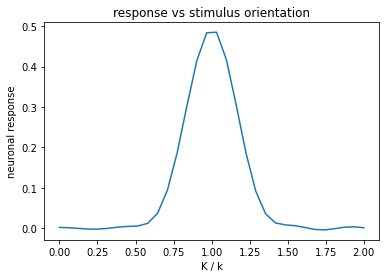

In [23]:
K_ks = np.array(K_ks)

plt.plot(K_ks, nrs)
plt.title('response vs stimulus orientation')
plt.xlabel('K / k')
plt.ylabel('neuronal response')
plt.show()

## (c)

In [24]:
theta = 0
phi = 0
K = np.pi
A=1

del_x = 0.1
del_y = 0.1

In [25]:
phis = np.linspace(0,2 *np.pi,16).tolist()

In [26]:
nrs = []

gabor = compute_gabor_rf(np.pi, phi, 2, 1, del_x=del_x, del_y=del_y)
for i, phi in enumerate(phis):
    sin_gr = compute_sinusoidal_grating(A, np.pi, 0, phi,del_x=del_x, del_y=del_y)
    nrs.append(compute_nr(sin_gr, gabor, del_x, del_y)) 

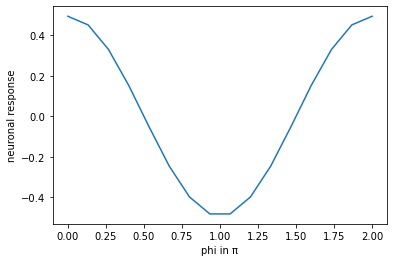

In [27]:
phis = np.array(phis)/np.pi

plt.plot(phis, nrs)
plt.xlabel('phi in π')
plt.ylabel('neuronal response')
plt.show()

# 4

## (a)

In [28]:
from scipy import signal

In [29]:
image = plt.imread('im3.png')
gray_img = image @ np.array([0.2989, 0.5870, 0.1140])

In [30]:
k = 8 * np.pi
sigma_x = 1./8
sigma_y = 1./8
phi = np.pi*0.5

gabor_kernel = compute_gabor_rf(k, phi, sigma_x, sigma_y)

In [31]:
res_img = signal.fftconvolve(gray_img, gabor_kernel, 'same')

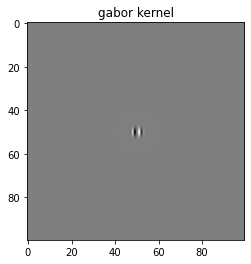

In [32]:
plt.imshow(gabor_kernel, cmap='gray')
plt.title('gabor kernel')

plt.show()

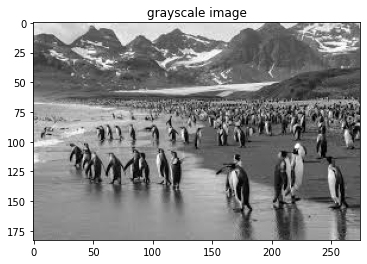

In [33]:
plt.imshow(gray_img, cmap='gray')
plt.title('grayscale image')

plt.show()

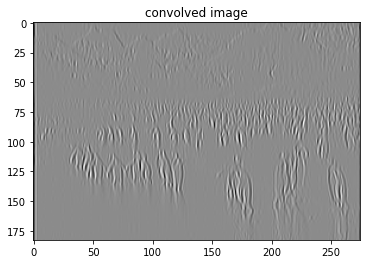

In [34]:
plt.imshow(res_img, cmap='gray')
plt.title('convolved image')

plt.show()